In [9]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import *
filterwarnings("ignore")

In [2]:
df=pd.read_csv("churn_prediction.csv")

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
df.shape

(28382, 21)

In [5]:
networth='customer_nw_category'
dslt='days_since_last_transaction'
pmeb='previous_month_end_balance'
ambpq='average_monthly_balance_prevQ'
ambpq2='average_monthly_balance_prevQ2'
cmc='current_month_credit'
pmc='previous_month_credit'
cmd='current_month_debit'
pmd='previous_month_debit'
cmb='current_month_balance'
pmb='previous_month_balance'
cmcd='current_month_credit/debit'
pmcd='previous_month_credit/debit'
mg='monthly_gain'
qg='quartile_gain'
cb='current_balance'
gtm='gain_this_month'
ambc='average_monthly_balance_comparison'
ac='avg_credit'
ad='avg_debit'
amb='avg_monthly_balance'
aqb='avg_quartile_balance'
pmngr='previous_month_net_gain_ratio'
cmngr='current_month_net_gain_ratio'

In [6]:
df=df.drop(['city','branch_code','customer_id'],axis=1)

In [7]:
df.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
customer_nw_category                 0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [8]:
#Imputing missing gender values
for i in range(len(df)):
    if pd.isnull(df['gender'][i]):
        if df['occupation'][i]=='retired':
            df['gender'][i]='Male'
        elif df['occupation'][i]=='salaried':
            df['gender'][i]='Male'
        elif df['customer_nw_category'][i]==3:
            df['gender'][i]='Male'
        elif df['dependents'][i]>=2:
            df['gender'][i]='Male'
        else:
            df['gender'][i]='Female'

/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im

In [10]:
df['dependents']=df['dependents'].fillna(0)
df['occupation']=df['occupation'].fillna('self_employed')

In [11]:
mean_days=np.mean(df['days_since_last_transaction'])
for i in range(len(df)):
    if pd.isnull(df['days_since_last_transaction'][i])==True:
        if df['dependents'][i]==0:
            df['days_since_last_transaction'][i]=74
        elif df['customer_nw_category'][i]==1:
            df['days_since_last_transaction'][i]=56
        elif df['occupation'][i]=='student':
            df['days_since_last_transaction'][i]=92
        else:
            df['days_since_last_transaction'][i]=mean_days

In [13]:
df.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
customer_nw_category              0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [14]:
df=df.astype({'customer_nw_category':'object'})
df.dtypes

vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
customer_nw_category               object
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

# Decision Tree without additionals

In [198]:
#Split dependent and independent variables
x=df.drop(['churn'],axis=1)
y=df['churn']
x.shape,y.shape

((28382, 17), (28382,))

In [199]:
x=pd.get_dummies(x)
x

,vintage,age,dependents,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,3135,66,0.0,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,...,0,1,0,0,0,1,0,0,1,0
1,310,35,0.0,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,...,0,1,0,0,0,1,0,0,1,0
2,2356,31,0.0,74.000000,3913.16,5815.29,4910.17,2815.94,0.61,0.61,...,0,1,0,0,1,0,0,0,1,0
3,478,90,0.0,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,...,1,0,0,0,0,1,0,0,1,0
4,2531,42,2.0,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,0.0,70.000000,1076.43,1076.43,2282.19,2787.70,0.30,0.30,...,1,0,0,0,0,0,1,0,1,0
28378,4919,34,0.0,14.000000,3844.10,4069.21,3668.83,3865.55,1.71,2.29,...,1,0,0,0,0,1,0,0,1,0
28379,297,47,0.0,0.000000,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,...,0,1,0,0,1,0,0,0,1,0
28380,2585,50,3.0,69.997814,1625.55,1625.55,1683.20,1857.42,0.20,0.20,...,0,1,0,0,0,1,0,0,0,1


In [200]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=30,stratify=y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((21286, 24), (7096, 24), (21286,), (7096,))

In [201]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=6)

In [202]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [203]:
print('Training score: ',dtc.score(train_x,train_y))
print('Test score: ',dtc.score(test_x,test_y))

Training score:  0.869961477027154
Test score:  0.8558342728297632


In [204]:
train_pred=dtc.predict(train_x)
test_pred=dtc.predict(test_x)

In [205]:
#Calculate f1 score
from sklearn.metrics import precision_recall_fscore_support as prfs
train_res=prfs(train_y,train_pred,average='binary')
print('Training f score: ',train_res)
test_res=prfs(test_y,test_pred,average='binary')
print('Test f score: ',test_res)

Training f score:  (0.7218243497926875, 0.48542458808618505, 0.580478933010003, None)
Test f score:  (0.6597374179431073, 0.4585551330798479, 0.541049798115747, None)


In [206]:
#Calculate roc-auc score
from sklearn.metrics import roc_auc_score as ras
print('Training auc score: ',ras(train_y,train_pred))
print('Test auc score: ',ras(test_y,test_pred))

Training auc score:  0.7214332443919766
Test auc score:  0.7023791060659575


## Hyperparameter tuning

In [61]:
#Tuning max depth

In [73]:
train_acc=[]
test_acc=[]
r=range(1,30)
from sklearn.metrics import roc_auc_score

In [74]:
for i in r:
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(train_x,train_y)
    train_pred=dt.predict(train_x)
    test_pred=dt.predict(test_x)
    train_acc.append(roc_auc_score(train_pred,train_y))
    test_acc.append(roc_auc_score(test_y,test_pred))

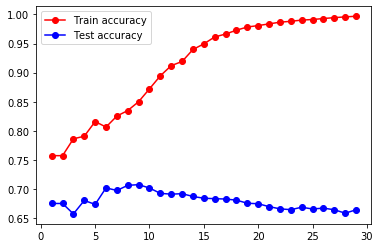

In [75]:
plt.plot(r,train_acc,color='red',label='Train accuracy',marker='o')
plt.plot(r,test_acc,color='blue',label='Test accuracy',marker='o')
plt.legend()

In [78]:
#max_depth=5 for best accuracy score,6 for best f1_score,6 for best roc score

In [65]:
#Tuning min_samples_leaf

In [137]:
train_acc=[]
test_acc=[]
r=range(1,201)
from sklearn.metrics import roc_auc_score

In [138]:
for i in r:
    dt=DecisionTreeClassifier(min_samples_leaf=i)
    dt.fit(train_x,train_y)
    train_pred=dt.predict(train_x)
    test_pred=dt.predict(test_x)
    train_acc.append(roc_auc_score(train_y,train_pred))
    test_acc.append(roc_auc_score(test_pred,test_y))

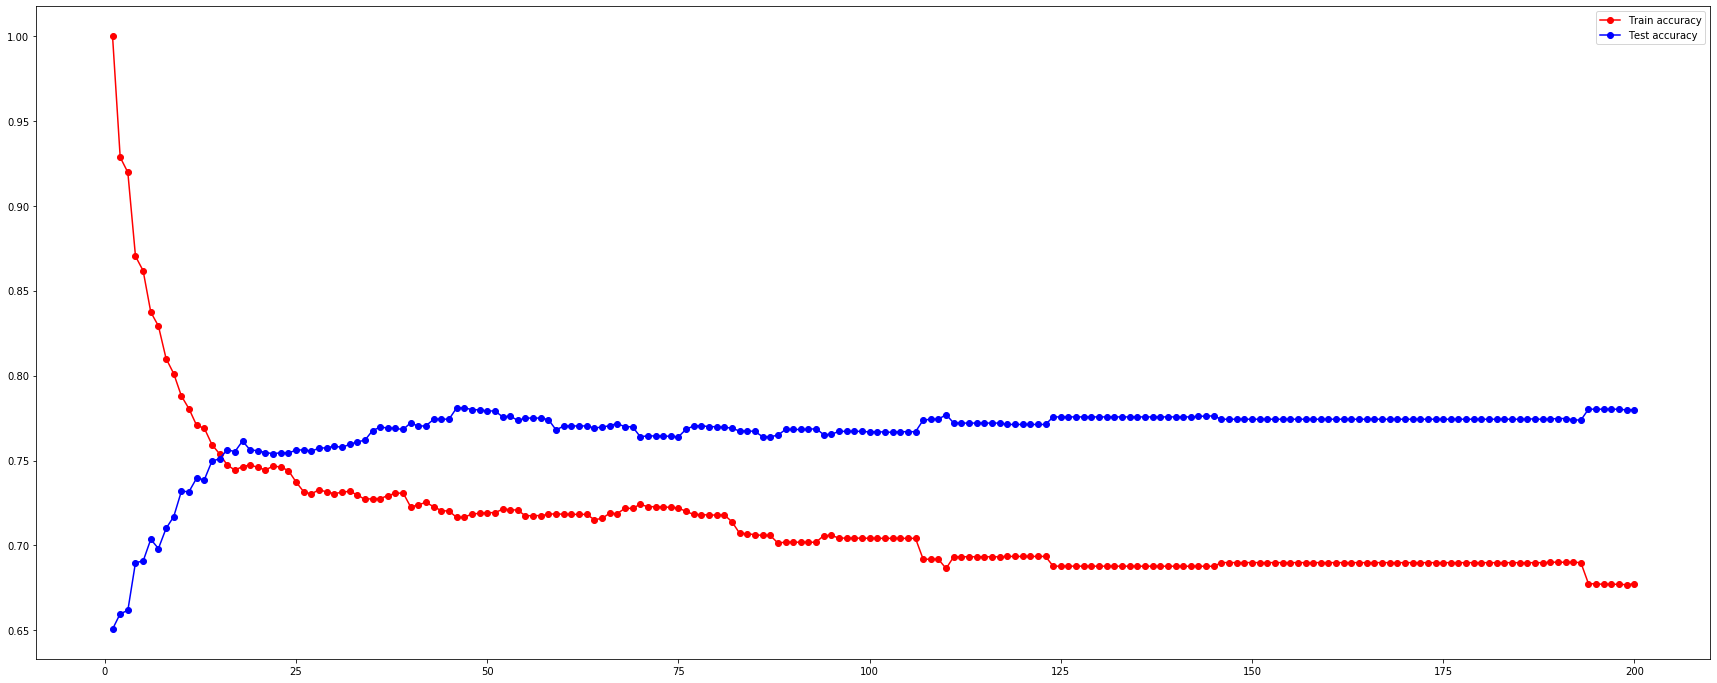

In [140]:
plt.figure(figsize=(30,12))
plt.plot(r,train_acc,color='red',label='Train accuracy',marker='o')
plt.plot(r,test_acc,color='blue',label='Test accuracy',marker='o')
plt.legend()
plt.show()

In [ ]:
#min_samples_leaf=200 for best accuracy,191 for f1

In [156]:
#Tuning max_features

In [193]:
train_acc=[]
test_acc=[]
r=range(1,25)
from sklearn.metrics import roc_auc_score

In [195]:
for i in r:
    dt=DecisionTreeClassifier(max_features=i,max_depth=5)
    dt.fit(train_x,train_y)
    train_pred=dt.predict(train_x)
    test_pred=dt.predict(test_x)
    train_acc.append(dt.score(train_x,train_y))
    test_acc.append(dt.score(test_x,test_y))

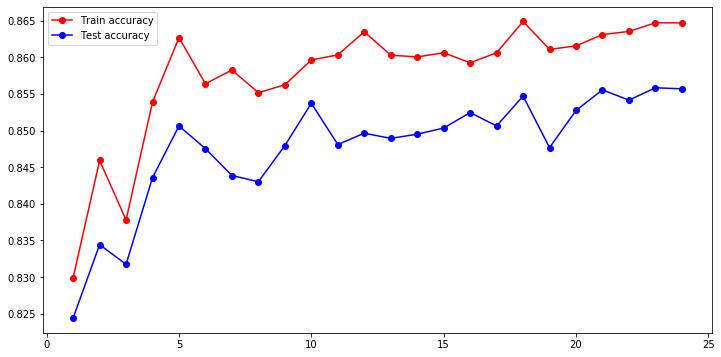

In [197]:
plt.figure(figsize=(12,6))
plt.plot(r,train_acc,color='red',label='Train accuracy',marker='o')
plt.plot(r,test_acc,color='blue',label='Test accuracy',marker='o')
plt.legend()

In [167]:
#max_features=16 for acc,17 for f1,15 for auc

(0.5478517139754926, 0.5243513882567138)